In [1]:
import sys
print(sys.executable)


/opt/anaconda3/envs/hf-py310/bin/python


In [11]:
# pandas, numpy, matplotlib, jupyter, ipywidgets, tqdm 등 한꺼번에 설치
!pip install pandas numpy matplotlib jupyter ipywidgets tqdm


  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 713.2 kB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 404.6 kB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [matplotlib]9 [matplotlib]


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [17]:
from konlpy.tag._mecab import Mecab
print("Mecab 불러오기 성공!")

ModuleNotFoundError: No module named 'konlpy'

In [19]:
from konlpy.tag import Mecab

mecab = Mecab()

print(mecab.morphs("이제 진짜 되는지 테스트해보자"))


ModuleNotFoundError: No module named 'konlpy'

In [75]:
dir_ = "/Users/sohyeonserenryu/Library/CloudStorage/Box-Box/!Sohyeon 2025_Box/ACE 592 SAE/grpup project/"

In [77]:
import pandas as pd

df_tariff = pd.read_csv("tariff_comments.csv", encoding='utf-8')

In [79]:
df_tariff.columns

Index(['video_id', 'comment_type', 'parent_id', 'comment_id', 'author', 'text',
       'published_at', 'like_count'],
      dtype='object')

/var/folders/9g/4ckvsl7x1p34ttfd90yh0m0h0000gn/T/ipykernel_63510/1867454077.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_tariff['minute'] = df_tariff['published_at'].dt.floor('T')


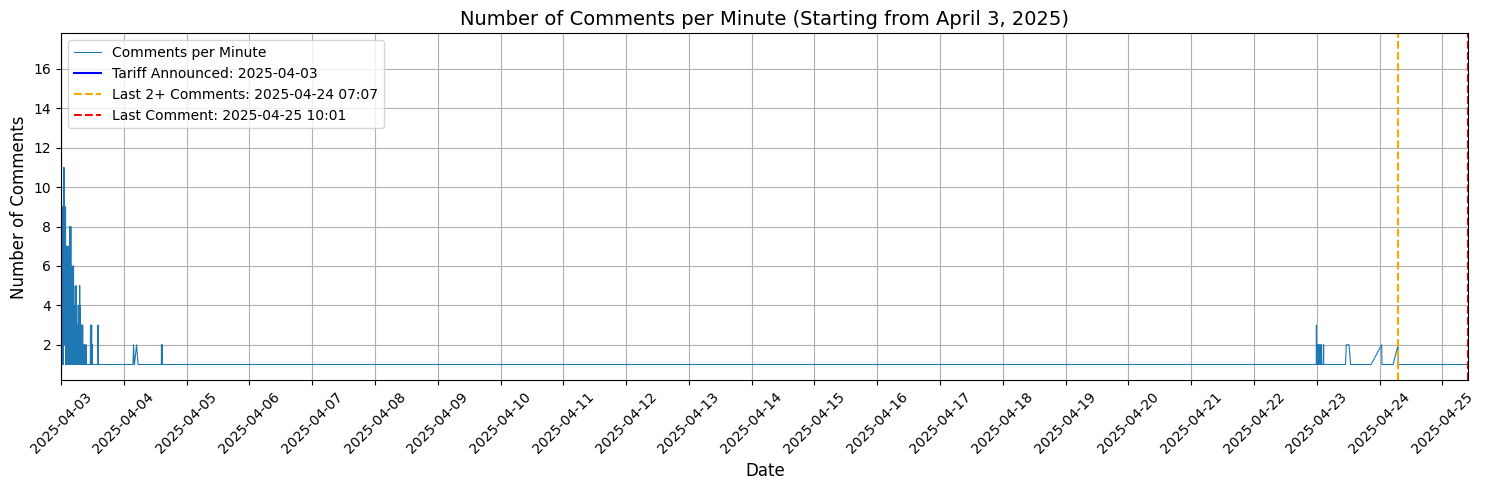

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 데이터 전처리
df_tariff['published_at'] = pd.to_datetime(df_tariff['published_at'], errors='coerce')
df_tariff['minute'] = df_tariff['published_at'].dt.floor('T')
comments_per_minute = df_tariff.groupby('minute').size().reset_index(name='comment_count')

# 기준 시점들
start_time = pd.Timestamp('2025-04-03', tz='UTC')
end_time = df_tariff['minute'].max()
last_2plus = comments_per_minute[comments_per_minute['comment_count'] >= 2]['minute'].max()

# 시각화 시작
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(comments_per_minute['minute'], comments_per_minute['comment_count'], linewidth=0.8, label='Comments per Minute')

# x축 설정: 하루 간격 + 날짜 포맷
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# x축 범위 설정
ax.set_xlim([start_time, end_time])

# 🔵 특정 날짜 강제 표시 (예: 4월 3일)
xticks = list(ax.get_xticks())
xticks.append(mdates.date2num(start_time))
ax.set_xticks(sorted(set(xticks)))

# x축 레이블 회전
plt.xticks(rotation=45)

# 주요 시점 선 추가
ax.axvline(start_time, color='blue', linestyle='-', label='Tariff Announced: 2025-04-03')
ax.axvline(last_2plus, color='orange', linestyle='--', label=f'Last 2+ Comments: {last_2plus.strftime("%Y-%m-%d %H:%M")}')
ax.axvline(end_time, color='red', linestyle='--', label=f'Last Comment: {end_time.strftime("%Y-%m-%d %H:%M")}')

# 제목, 라벨, 범례, 격자
ax.set_title('Number of Comments per Minute (Starting from April 3, 2025)', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number of Comments', fontsize=12)
ax.legend()
ax.grid(True)

# 레이아웃 최적화
plt.tight_layout()
plt.show()


In [83]:
# 기간 설정: 4월 3일~ 4월 4일 (UTC)
start = pd.Timestamp('2025-04-03', tz='UTC')
end = pd.Timestamp('2025-04-04 23:59:59', tz='UTC')

# 기간 내 댓글 필터링
df_in_period = df_tariff[(df_tariff['published_at'] >= start) & (df_tariff['published_at'] <= end)]

# 결과 계산
count_in_period = df_in_period.shape[0]
total_count = df_tariff.shape[0]
percentage = (count_in_period / total_count) * 100

print(f"🗓️ 2025-04-03 ~ 2025-04-04 기간 댓글 수: {count_in_period:,}개")
print(f"📊 전체 댓글 중 비중: {percentage:.2f}%")

🗓️ 2025-04-03 ~ 2025-04-04 기간 댓글 수: 1,431개
📊 전체 댓글 중 비중: 63.63%


In [85]:
!pip install transformers sentencepiece

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [33]:
!pip install torch

In [35]:
!pip install torch torchvision torchaudio

In [37]:
!which python

/opt/anaconda3/envs/hf-py310/bin/python


In [87]:
from transformers import pipeline

# 감성 분석 파이프라인 로드
classifier = pipeline("sentiment-analysis", model="WhitePeak/bert-base-cased-Korean-sentiment")

# 예시 문장 분석
result = classifier("이 제품 정말 좋아요!")
print(result)

Device set to use mps:0


[{'label': 'LABEL_1', 'score': 0.9905368685722351}]


In [89]:
from transformers import pipeline

# 파이프라인 로드
classifier = pipeline("sentiment-analysis", model="WhitePeak/bert-base-cased-Korean-sentiment")

# 감성 점수 계산 함수
def get_sentiment_score(text):
    try:
        result = classifier(text[:512])[0]
        score = result['score']
        label = result['label']
        if label == 'LABEL_1':  # 긍정
            return score
        else:  # 부정
            return -score
    except:
        return None

# 예시
print(get_sentiment_score("이 제품 정말 좋아요!"))    # → 0.99 (긍정)
print(get_sentiment_score("별로였어요. 다시는 안 살래요."))  # → -0.98 (부정)

Device set to use mps:0


0.9905368685722351
-0.997114896774292


In [91]:
from tqdm.notebook import tqdm

# 파이프라인 로드
classifier = pipeline("sentiment-analysis", model="WhitePeak/bert-base-cased-Korean-sentiment")

# tqdm 적용을 위한 설정 (진행률 표시)
tqdm.pandas()

# 감성 점수 계산 함수
def get_sentiment_score(text):
    try:
        result = classifier(text[:512])[0]
        score = result['score']
        label = result['label']
        return score if label == 'LABEL_1' else -score
    except:
        return None

# 감성 점수 계산 적용 (시간 걸릴 수 있음)
df_tariff['sentiment_score'] = df_tariff['text'].progress_apply(get_sentiment_score)

Device set to use mps:0


  0%|          | 0/2249 [00:00<?, ?it/s]

In [66]:
!pip install konlpy wordcloud

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached konlpy-0.6.0-py2.py3-none-any.whl.metadata (1.9 kB)
Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.5/584.5 kB 1.4 MB/s eta 0:00:00-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [wordcloud]


In [95]:
from konlpy.tag import Okt

okt = Okt(jvmpath="/opt/homebrew/opt/openjdk/libexec/openjdk.jdk/Contents/Home/lib/server/libjvm.dylib")

from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 형태소 분석기
okt = Okt()

# 모든 댓글 합치기
all_text = " ".join(df_tariff['text'].dropna().astype(str).tolist())

# 명사 추출
nouns = okt.nouns(all_text)

# 불용어 제거 (예시: 조사, 감탄사 등)
stopwords = ['것', '거', '좀', '더', '저', '나', '이', '등', '수', '그', '때', '있', '있다']
words_filtered = [word for word in nouns if len(word) > 1 and word not in stopwords]

# 상위 10개 단어 추출
word_counts = Counter(words_filtered)
top10 = word_counts.most_common(10)

print("📌 상위 10개 자주 등장한 단어:")
for word, count in top10:
    print(f"{word}: {count}회")

📌 상위 10개 자주 등장한 단어:
미국: 856회
관세: 439회
한국: 303회
트럼프: 272회
중국: 253회
나라: 211회
우리: 184회
국가: 116회
우리나라: 101회
수출: 96회


In [103]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 사용할 한글 폰트 이름
font_name = 'AppleGothic'  # 또는 'Apple SD Gothic Neo'

# matplotlib 기본 폰트 설정
plt.rc('font', family=font_name)

# 음수 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False



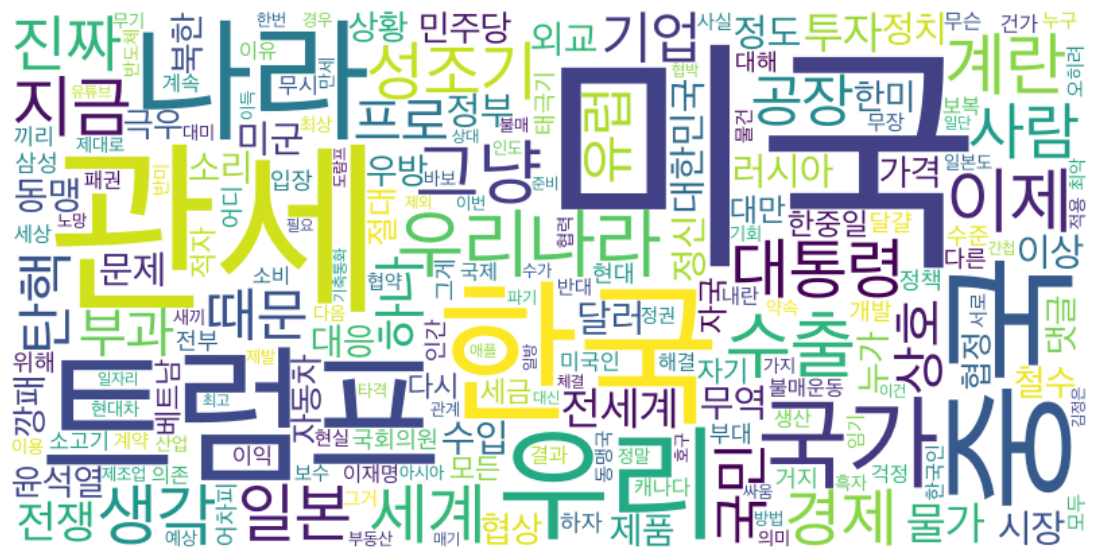

In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'

wc = WordCloud(font_path=font_path, background_color='white', width=800, height=400)
wc.generate_from_frequencies(word_counts)

plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [109]:
# 텍스트 출력 제한 해제
pd.set_option('display.max_colwidth', None)

# 긍정 상위 10개, 부정 상위 10개 정렬
top_positive = df_tariff.sort_values(by='sentiment_score', ascending=False).head(10)
top_negative = df_tariff.sort_values(by='sentiment_score', ascending=True).head(10)

# 결합해서 확인
result = pd.concat([
    top_positive[['text', 'sentiment_score']],
    top_negative[['text', 'sentiment_score']]
])

# 출력
result

,text,sentiment_score
112,이참에 우리도 물가나 확실히 잡고 구조조정 잘 해서 다음 상승 사이클 올라탈 준비나 하자,0.991761
314,달러 무한대 찍어내서 먹고 살아가는 놈들이...<br>니들국가내에서 자급자족하고 살아가라.,0.991560
1370,자 이제 민주당이 정권 쥐면 완벽한 그림이 그려지겠군 ㅋㅋㅋㅋㅋㅋㅋㅋ 지금까지 한국 서버를 이용해주신 여러분 감사합니다. 조선족 서버로 다시 리오픈할 예정이니 기대 해주시길 바래요. ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,0.991504
393,미국 좋다고 드럽게 빨아대던 아스팔트 꼴통들 모하냐 !,0.991200
713,달려라 달려 로보트야 날아라 날아 태권브이\r<br>정의로 뭉친 주먹 로보트 태권\r<br>용감하고 씩씩한 우리의 친구\r<br>\r<br>두 팔을 곧게 앞으로 뻗어\r<br>럼프을 향해 하늘 날으면\r<br>멋지다 신난다 태권브이 만만세\r<br>무적의 우리 친구 태권브이,0.991018
708,감사합니다. 트황. 한쿡 김치 잘 부탁 드립니다. 관세 더 때려도 좋습니다.,0.990978
1674,손오공 전투력보다 잘올라가네!,0.990875
627,"우리나라 경제인들 트럼프 지지한 인간들 많았지 ~ <br>특히, 신세계그룹 정용진!!!",0.990587
670,유럽 중일이랑 함께할게 고맙다 토람프😅 빨리 다이해라<br>백배로 하나될께 we are the one 🌎🤝🏻🇰🇷🤝🏻🇯🇵🤝🏻🌍,0.990532
1728,굿굿 이거지 ㅋㅋㅋㅋㅋㅋ,0.990507


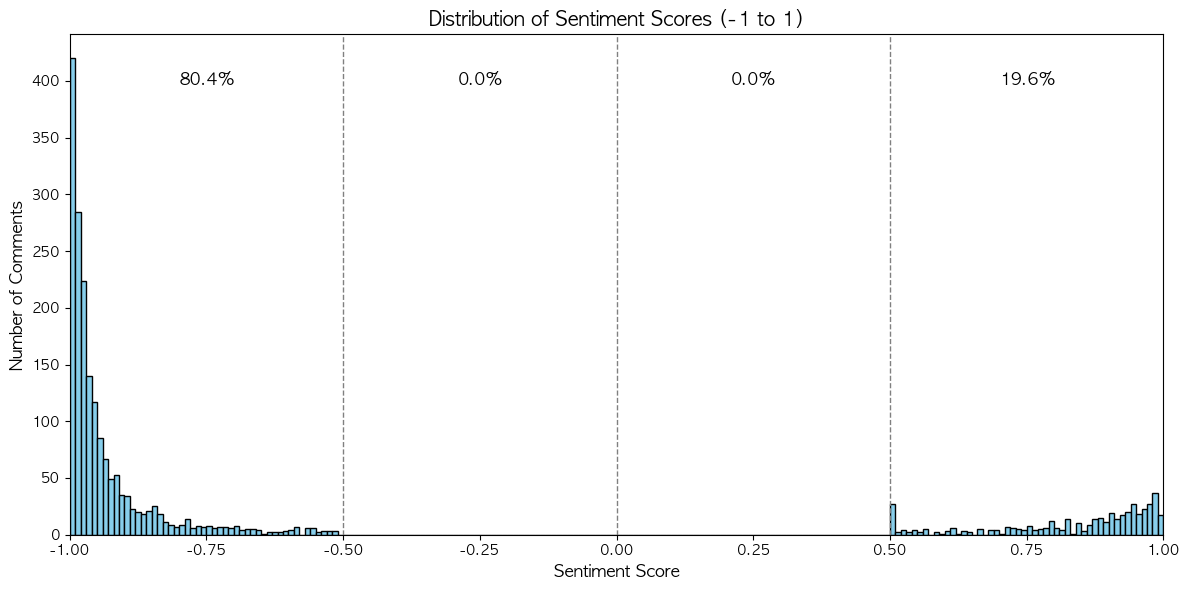

In [111]:
import numpy as np

# NaN 제거
sentiment_scores = df_tariff['sentiment_score'].dropna()

# 구간 정의
bins = np.arange(-1, 1.01, 0.01)
ranges = [(-1.0, -0.5), (-0.5, 0.0), (0.0, 0.5), (0.5, 1.0)]
range_labels = ['-1 ~ -0.5', '-0.5 ~ 0', '0 ~ 0.5', '0.5 ~ 1']
total = len(sentiment_scores)

# 각 구간별 비율 계산
range_counts = [(sentiment_scores[(sentiment_scores > low) & (sentiment_scores <= high)].count()) for (low, high) in ranges]
range_percents = [f"{count/total*100:.1f}%" for count in range_counts]

# 히스토그램
plt.figure(figsize=(12, 6))
plt.hist(sentiment_scores, bins=bins, edgecolor='black', color='skyblue')
plt.xlim([-1, 1])
plt.title('Distribution of Sentiment Scores (-1 to 1)', fontsize=14)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.grid(False)

# 세로선: 구분선 추가
for x in [-0.5, 0, 0.5]:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=1)

# 텍스트 비율 표시
x_positions = [-0.75, -0.25, 0.25, 0.75]
for i, x in enumerate(x_positions):
    plt.text(x, plt.ylim()[1]*0.9, range_percents[i], ha='center', fontsize=12, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

In [113]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# 모델과 토크나이저 로드
model_name = "nlp04/korean_sentiment_analysis_kcelectra"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# 감성 분석 파이프라인 생성
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

tokenizer_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/450k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.87k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/511M [00:00<?, ?B/s]

Device set to use mps:0


In [115]:
def get_sentiment_label(text):
    try:
        result = classifier(text[:512])[0]
        return result['label']
    except:
        return None

# 감성 분석 적용
df_tariff['sentiment_label'] = df_tariff['text'].apply(get_sentiment_label)

In [117]:
# 감성 라벨 → 숫자 매핑
label_map = {
    'negative': -1,
    'neutral': 0,
    'positive': 1
}

# 숫자형 점수 열 추가
df_tariff['sentiment_numeric'] = df_tariff['sentiment_label'].map(label_map)

In [119]:
# NaN 제외한 값으로 집계
sentiment_min = df_tariff['sentiment_numeric'].min()
sentiment_max = df_tariff['sentiment_numeric'].max()
sentiment_mean = df_tariff['sentiment_numeric'].mean()

print(f"📉 최소값 (Min): {sentiment_min}")
print(f"📈 최대값 (Max): {sentiment_max}")
print(f"📊 평균값 (Mean): {sentiment_mean:.3f}")

📉 최소값 (Min): nan
📈 최대값 (Max): nan
📊 평균값 (Mean): nan


In [121]:
df_tariff['sentiment_label'].value_counts(dropna=False)

sentiment_label
짜증남           1532
슬픔(우울한)        275
일상적인           205
즐거운(신나는)        90
걱정스러운(불안한)      61
생각이 많은          28
기쁨(행복한)         28
설레는(기대하는)       21
고마운              8
사랑하는             1
Name: count, dtype: int64

In [123]:
label_score_map = {
    '짜증남': -1,
    '슬픔(우울한)': -0.8,
    '걱정스러운(불안한)': -0.6,
    '힘듦(지침)': -0.6,
    '생각이 많은': -0.3,
    '일상적인': 0,
    '설레는(기대하는)': 0.4,
    '기쁨(행복한)': 0.6,
    '고마운': 0.8,
    '즐거운(신나는)': 1,
    '사랑하는': 1
}

In [129]:
# 감정 점수 매핑
df_tariff['sentiment_score'] = df_tariff['sentiment_label'].map(label_score_map)

# 통계량 계산
sentiment_min = df_tariff['sentiment_score'].min()
sentiment_max = df_tariff['sentiment_score'].max()
sentiment_mean = df_tariff['sentiment_score'].mean()

print(f"📉 최소값 (Min): {sentiment_min}")
print(f"📈 최대값 (Max): {sentiment_max}")
print(f"📊 평균값 (Mean): {sentiment_mean:.3f}")

📉 최소값 (Min): -1.0
📈 최대값 (Max): 1.0
📊 평균값 (Mean): -0.745


In [131]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F

# 모델 및 토크나이저 로드
model_name = "nlp04/korean_sentiment_analysis_kcelectra"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(54343, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

In [133]:
import pandas as pd

def get_sentiment_score(text):
    try:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        probs = F.softmax(outputs.logits, dim=1).squeeze().tolist()
        p_neg, p_neu, p_pos = probs
        sentiment_score = -1 * p_neg + 0 * p_neu + 1 * p_pos
        labels = ['negative', 'neutral', 'positive']
        sentiment_label = labels[probs.index(max(probs))]
        return pd.Series([sentiment_label, sentiment_score])
    except Exception as e:
        return pd.Series(['error', None])

In [135]:
sample_texts = [
    "이참에 우리도 물가나 확실히 잡고 구조조정 잘 해서 다음 상승 사이클 올라탈 준비나 하자",
    "달려라 달려 로보트야 날아라 날아 태권브이\r<br>정의로 뭉친 주먹 로보트 태권\r<br>용감하고 씩씩한 우리의 친구\r<br>\r<br>두 팔을 곧게 앞으로 뻗어\r<br>럼프을 향해 하늘 날으면\r<br>멋지다 신난다 태권브이 만만세\r<br>무적의 우리 친구 태권브이",
    "성조기 마이 흔들어 ㅋㅋ<br>미국 입장에선 아무 도움도 안되는 정치적 성조기 흔들다 쓰레기통행인거 다 안다 ㅋㅋㅋ",
    "흔들때임 아시아 단결안하면 개뚜드려맞고 주요산업에 농업마저 다망가질판임",
    "미국에 수출하지 말고, 수입도 하지 마라, 안하면 되지"
]

# 감성 분석 실행
sample_df = pd.DataFrame(sample_texts, columns=["text"])
sample_df[['sentiment_label', 'sentiment_score']] = sample_df['text'].apply(get_sentiment_score)

# 결과 출력
print(sample_df)

                                                                                                                                                        text  \
0                                                                                                          이참에 우리도 물가나 확실히 잡고 구조조정 잘 해서 다음 상승 사이클 올라탈 준비나 하자   
1  달려라 달려 로보트야 날아라 날아 태권브이\r<br>정의로 뭉친 주먹 로보트 태권\r<br>용감하고 씩씩한 우리의 친구\r<br>\r<br>두 팔을 곧게 앞으로 뻗어\r<br>럼프을 향해 하늘 날으면\r<br>멋지다 신난다 태권브이 만만세\r<br>무적의 우리 친구 태권브이   
2                                                                                           성조기 마이 흔들어 ㅋㅋ<br>미국 입장에선 아무 도움도 안되는 정치적 성조기 흔들다 쓰레기통행인거 다 안다 ㅋㅋㅋ   
3                                                                                                                    흔들때임 아시아 단결안하면 개뚜드려맞고 주요산업에 농업마저 다망가질판임   
4                                                                                                                             미국에 수출하지 말고, 수입도 하지 마라, 안하면 되지   

  sentiment_label sentiment_score  
0  

In [137]:
# 감정 클래스별 감정 극성 점수 정의 (VADER-style)
class_polarity = {
    '짜증남': -1.0,
    '슬픔(우울한)': -0.8,
    '걱정스러운(불안한)': -0.6,
    '힘듦(지침)': -0.5,
    '생각이 많은': -0.3,
    '일상적인': 0.0,
    '설레는(기대하는)': 0.4,
    '기쁨(행복한)': 0.6,
    '고마운': 0.8,
    '즐거운(신나는)': 1.0,
    '사랑하는': 1.0
}

In [139]:
def get_vader_style_sentiment(text):
    try:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)

        # softmax 확률값
        probs = F.softmax(outputs.logits, dim=1).squeeze()

        # 가중 평균 계산
        total_score = 0
        for idx, prob in enumerate(probs):
            label = model.config.id2label[idx]
            polarity = class_polarity.get(label, 0)  # 정의되지 않은 감정은 중립으로 간주
            total_score += prob.item() * polarity

        # 가장 높은 확률의 감정 라벨
        pred_idx = torch.argmax(probs).item()
        top_label = model.config.id2label[pred_idx]

        return pd.Series([top_label, total_score])
    except Exception as e:
        print(f"❗ 오류 발생한 문장: {text}")
        print(f"🔍 오류 메시지: {e}")
        return pd.Series(['error', None])

In [141]:
sample_df[['sentiment_label', 'vader_score']] = sample_df['text'].apply(get_vader_style_sentiment)
print(sample_df)

                                                                                                                                                        text  \
0                                                                                                          이참에 우리도 물가나 확실히 잡고 구조조정 잘 해서 다음 상승 사이클 올라탈 준비나 하자   
1  달려라 달려 로보트야 날아라 날아 태권브이\r<br>정의로 뭉친 주먹 로보트 태권\r<br>용감하고 씩씩한 우리의 친구\r<br>\r<br>두 팔을 곧게 앞으로 뻗어\r<br>럼프을 향해 하늘 날으면\r<br>멋지다 신난다 태권브이 만만세\r<br>무적의 우리 친구 태권브이   
2                                                                                           성조기 마이 흔들어 ㅋㅋ<br>미국 입장에선 아무 도움도 안되는 정치적 성조기 흔들다 쓰레기통행인거 다 안다 ㅋㅋㅋ   
3                                                                                                                    흔들때임 아시아 단결안하면 개뚜드려맞고 주요산업에 농업마저 다망가질판임   
4                                                                                                                             미국에 수출하지 말고, 수입도 하지 마라, 안하면 되지   

  sentiment_label sentiment_score  vade

In [143]:
# 분석 수행 (진행률 표시)
df_tariff[['sentiment_label', 'vader_score']] = df_tariff['text'].progress_apply(get_vader_style_sentiment)

  0%|          | 0/2249 [00:00<?, ?it/s]

In [145]:
df_tariff.to_csv("korean_sentiment_scored.csv", index=False)

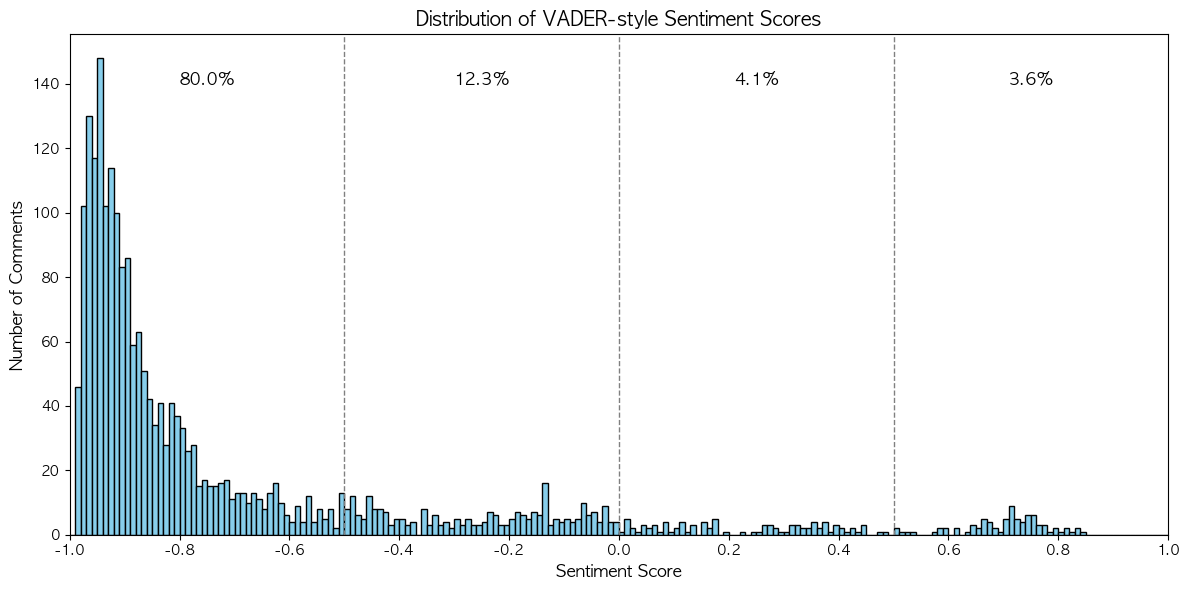

In [147]:
# NaN 제거한 vader_score 추출
vader_scores = df_tariff['vader_score'].dropna()

# 0.01 간격 구간 설정
bins = np.arange(-1.0, 1.01, 0.01)

# 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.hist(vader_scores, bins=bins, color='skyblue', edgecolor='black')

# 기준선 표시: -0.5, 0, 0.5
for x in [-0.5, 0, 0.5]:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=1)

# 전체 수
total = len(vader_scores)

# 각 구간별 비율 계산
ranges = [(-1.0, -0.5), (-0.5, 0.0), (0.0, 0.5), (0.5, 1.0)]
positions = [-0.75, -0.25, 0.25, 0.75]
labels = []

for (low, high) in ranges:
    count = vader_scores[(vader_scores > low) & (vader_scores <= high)].count()
    percent = count / total * 100
    labels.append(f"{percent:.1f}%")

# 상단에 비율 텍스트 표시
y_max = plt.ylim()[1]
for x, label in zip(positions, labels):
    plt.text(x, y_max * 0.9, label, ha='center', fontsize=12, color='black')

# 시각화 세부 설정
plt.title("Distribution of VADER-style Sentiment Scores", fontsize=14)
plt.xlabel("Sentiment Score", fontsize=12)
plt.ylabel("Number of Comments", fontsize=12)
plt.xticks(np.arange(-1, 1.1, 0.2))
plt.grid(False)
plt.xlim([-1, 1])
plt.tight_layout()
plt.show()

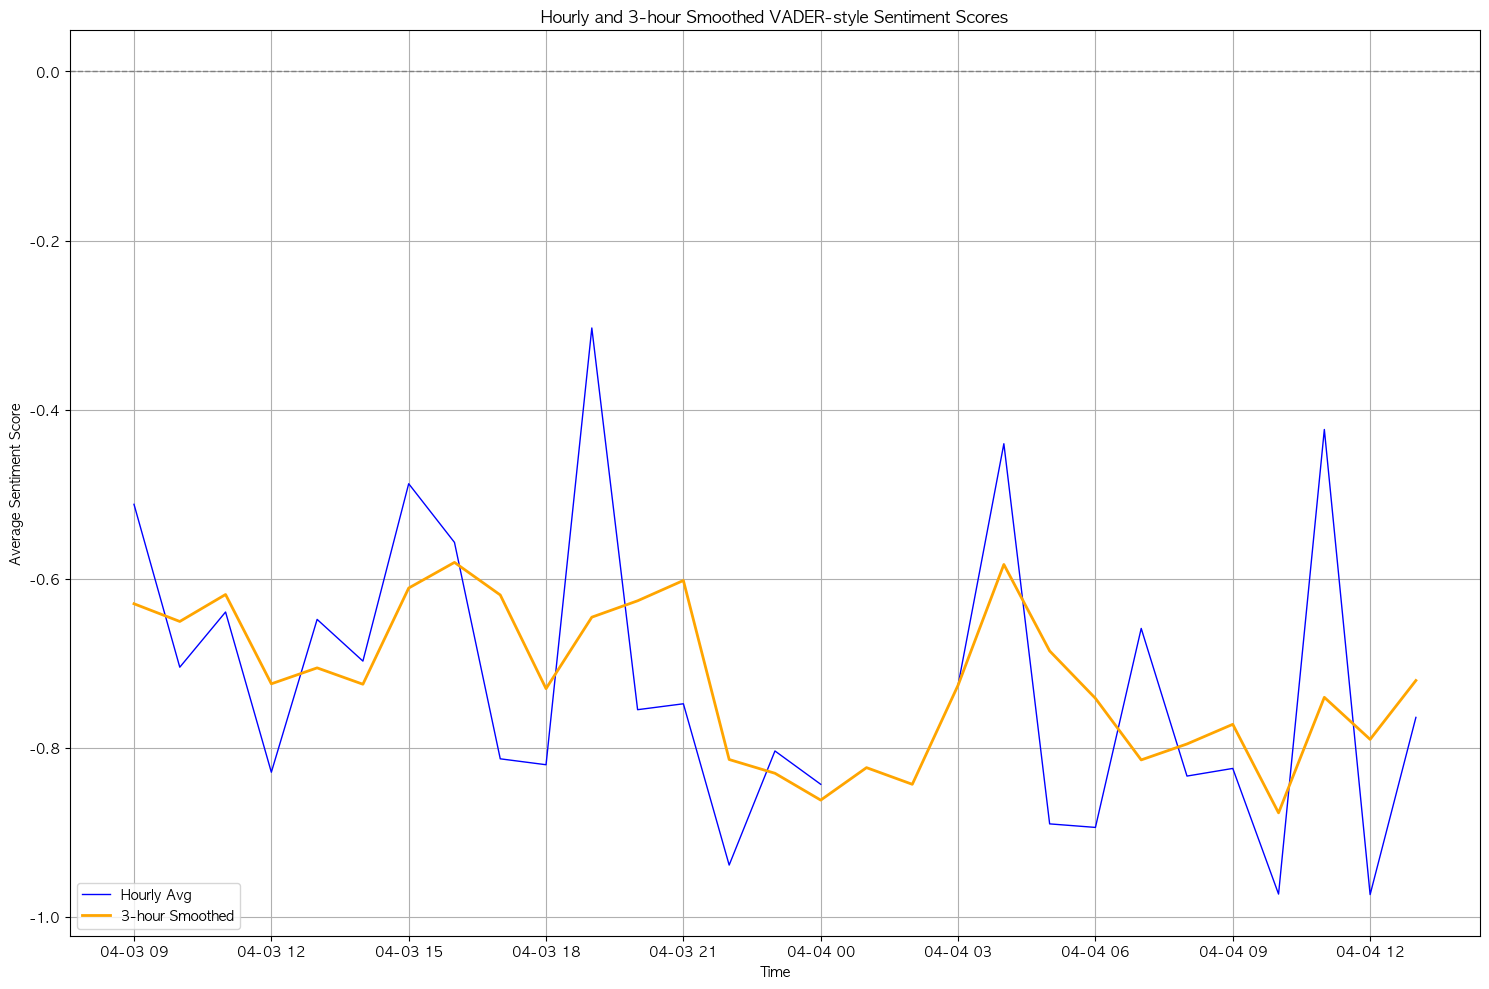

In [159]:
# 1. 숫자형 열만 선택하여 리샘플링
numeric_cols = ['like_count', 'sentiment_score', 'sentiment_numeric', 'vader_score']
df_numeric = df_tariff[numeric_cols + ['published_at']]

# 2. 리샘플링 수행
df_hourly = df_numeric.set_index('published_at').resample('1h').mean()

# 3. 3시간 이동 평균 계산
df_hourly['smoothed'] = df_hourly['vader_score'].rolling(window=3, min_periods=1).mean()

# 타임존 맞추기 (UTC)
start_time = pd.to_datetime('2025-04-03 09:00:00', utc=True)
end_time = pd.to_datetime('2025-04-04 13:00:00', utc=True)

# 시간 필터링
df_plot = df_hourly.loc[start_time:end_time]

# 그래프 그리기
plt.figure(figsize=(15, 10))
plt.plot(df_plot.index, df_plot['vader_score'], color='blue', linewidth=1, label='Hourly Avg')
plt.plot(df_plot.index, df_plot['smoothed'], color='orange', linewidth=2, label='3-hour Smoothed')

# 기준선
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# 마무리 설정
plt.title("Hourly and 3-hour Smoothed VADER-style Sentiment Scores")
plt.xlabel("Time")
plt.ylabel("Average Sentiment Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [165]:
!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from konlpy.tag import Okt
from tqdm.notebook import tqdm
import pandas as pd

# 형태소 분석기 정의
okt = Okt()

# 한글만 추출 + 명사/형용사 중심
def preprocess(text):
    try:
        return ' '.join(okt.nouns(text))
    except:
        return ''

# 전처리 진행
tqdm.pandas()
df_tariff['clean_text'] = df_tariff['text'].progress_apply(preprocess)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_tariff['clean_text'])

# KMeans 클러스터링 (예: 5개 클러스터)
kmeans = KMeans(n_clusters=5, random_state=42)
df_tariff['cluster'] = kmeans.fit_predict(X)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 9.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 9.3 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


  0%|          | 0/2249 [00:00<?, ?it/s]

/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight


In [167]:
# KMeans 클러스터링 (예: 5개 클러스터)
kmeans = KMeans(n_clusters=3, random_state=42)
df_tariff['cluster'] = kmeans.fit_predict(X)

/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight


In [169]:
# 클러스터별 상위 단어 보기
def get_top_keywords(cluster_num, n_terms=10):
    centroids = kmeans.cluster_centers_
    terms = vectorizer.get_feature_names_out()
    top_terms = centroids[cluster_num].argsort()[::-1][:n_terms]
    return [terms[i] for i in top_terms]

# 예시: 클러스터 0~4의 핵심 단어
for i in range(3):
    print(f"\n🔹 Cluster {i} top keywords:")
    print(get_top_keywords(i))


🔹 Cluster 0 top keywords:
['관세', '트럼프', '중국', '한국', '우리', '나라', '계란', '성조기', '일본', '국가']

🔹 Cluster 1 top keywords:
['미국', '관세', '한국', '우리', '중국', '트럼프', '수출', '나라', '세계', '이제']

🔹 Cluster 2 top keywords:
['대통령', '나라', '미국', '탄핵', '트럼프', '우리', '중국', '협상', '지금', '한국']


In [171]:
# 각 클러스터에서 예시 댓글 3개씩
for i in range(3):
    print(f"\n=== Cluster {i} ===")
    samples = df_tariff[df_tariff['cluster'] == i]['text'].dropna().sample(3, random_state=42)
    for comment in samples:
        print("-", comment)


=== Cluster 0 ===
- 극우넘들 트럼프한테 뒤통수 맞으니 어떠냐?
- 트럼프 임기끝나면 그이후에는 어떻게 변할수 있을지 모른다 미국에 투자해서 중국에 투자하는거나 다를바없다
- 극우들아!!!~~<br>미국이 우방 동맹인데 26% 관세라니 FTA도 없던걸로하고   이럴수가 있나요??? 극우들아 성조기를 흔들어 쇼하면서 정치에 이용한것을 트럼프가 괴씸하게 알고 관세폭단 때렸다 극우 니들은 나라에 도움이 안되요? 동맹이면 10% 상호관세 해야지 !~~~

=== Cluster 1 ===
- 우린 미국산에 비관세 해라
- 미국자동차는 미국에서 90%  생산 하는데 이게 무슨 논리야  웃기네~~
- @@donghyunkim3999인정합니다 무슨 미국이 수출을 안하면 그만 이러고있네요 그냥 막무가내로 말한다고 되는것이ㅜ아닌데

=== Cluster 2 ===
- 트럼프 입장에선 <br>한국 두들겨 패기엔 지금이 딱이지.<br>대통령도 멍청한데 심지어 탄핵재판중이지<br>정치적, 외교적으로 휘둘리지 않고<br>맞설수 있는 인물이 하나도 없지<br>지금이 패기 딱좋음.<br>어차피 한국 경제가 무너지는것이지<br>미국이 무너지는게 아니니 알빠노인듯
- 저런사람이 미국대통령이라니  미국인들 뭐하냐  정신좀 차려라
- 4년 후 벤스가 대통령된다 ㅋㅋㅋㅋ


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


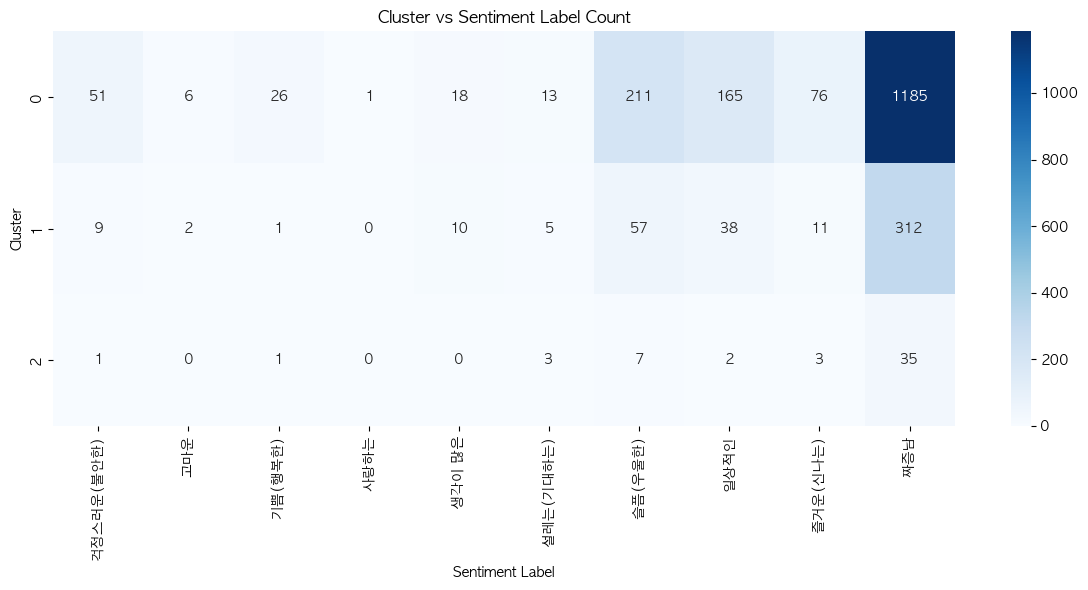

In [175]:
!pip install seaborn
# 유효한 sentiment_label만 사용
valid_df = df_tariff[df_tariff['sentiment_label'].notna()]
valid_df = valid_df[valid_df['sentiment_label'] != 'error']

# 교차표 생성
cross_tab = pd.crosstab(valid_df['cluster'], valid_df['sentiment_label'])

# 보기 좋게 표시
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title("Cluster vs Sentiment Label Count")
plt.xlabel("Sentiment Label")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

In [177]:
# 각 클러스터에서 가장 많은 감정 레이블 추출
dominant_sentiments = cross_tab.idxmax(axis=1)
dominant_counts = cross_tab.max(axis=1)

# 요약 표
cluster_summary = pd.DataFrame({
    "Dominant Sentiment": dominant_sentiments,
    "Count": dominant_counts
})
display(cluster_summary)

,Dominant Sentiment,Count
cluster,,
0,짜증남,1185
1,짜증남,312
2,짜증남,35


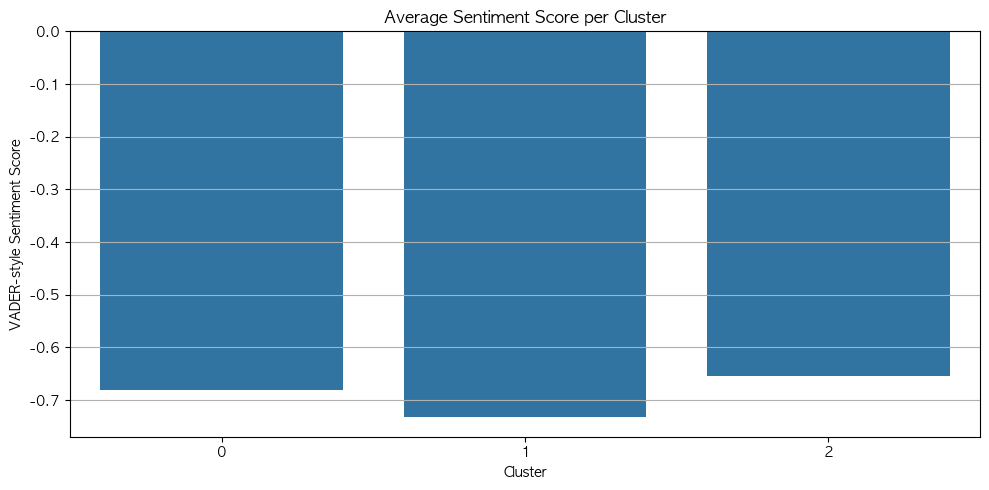

,Cluster,Avg Sentiment Score,Std Dev,Count
0,0,-0.680672,0.420106,1752
1,1,-0.732723,0.341108,445
2,2,-0.654450,0.511714,52


In [179]:
# 유효한 vader_score만 사용
valid_scores = df_tariff[['cluster', 'vader_score']].dropna()

# 클러스터별 통계 계산
cluster_sentiment_stats = valid_scores.groupby('cluster')['vader_score'].agg(['mean', 'std', 'count']).reset_index()
cluster_sentiment_stats.columns = ['Cluster', 'Avg Sentiment Score', 'Std Dev', 'Count']

# 보기 좋게 출력
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.barplot(data=cluster_sentiment_stats, x='Cluster', y='Avg Sentiment Score')
plt.title("Average Sentiment Score per Cluster")
plt.ylabel("VADER-style Sentiment Score")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 통계표도 함께 출력
display(cluster_sentiment_stats)

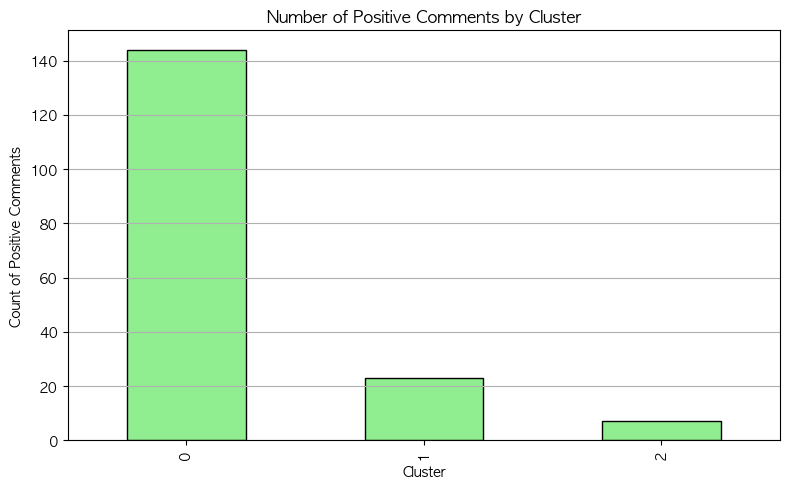

,Cluster,Positive Count
0,0,144
1,1,23
2,2,7


In [183]:
# 긍정 댓글 필터링
positive_df = df_tariff[df_tariff['vader_score'] > 0]

# 클러스터별 긍정 댓글 수 집계
positive_counts = positive_df['cluster'].value_counts().sort_index()

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
positive_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Number of Positive Comments by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count of Positive Comments")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 수치 확인
positive_counts_df = positive_counts.reset_index()
positive_counts_df.columns = ['Cluster', 'Positive Count']
display(positive_counts_df)

In [185]:
# 1. 긍정 댓글만 추출
positive_df = df_tariff[df_tariff['vader_score'] > 0].copy()

# 2. 형태소 분석기 설정
okt = Okt()

# 3. 텍스트 전처리 함수 (명사 추출)
def preprocess(text):
    try:
        return ' '.join(okt.nouns(text))
    except:
        return ''

# 4. 전처리 적용
tqdm.pandas()
positive_df['clean_text'] = positive_df['text'].progress_apply(preprocess)

# 5. TF-IDF 벡터화 (상위 1000개 단어 기준)
vectorizer_pos = TfidfVectorizer(max_features=1000)
X_pos = vectorizer_pos.fit_transform(positive_df['clean_text'])

  0%|          | 0/174 [00:00<?, ?it/s]

In [187]:
# 6. KMeans 클러스터링 (예: 4개 클러스터)
kmeans_pos = KMeans(n_clusters=2, random_state=42)
positive_df['cluster'] = kmeans_pos.fit_predict(X_pos)

In [189]:
def get_top_keywords_pos(cluster_num, n_terms=10):
    centroids = kmeans_pos.cluster_centers_
    terms = vectorizer_pos.get_feature_names_out()
    top_terms = centroids[cluster_num].argsort()[::-1][:n_terms]
    return [terms[i] for i in top_terms]

# 예시: 각 클러스터의 핵심 단어
for i in range(2):
    print(f"\n🔹 Cluster {i} Top Keywords:")
    print(get_top_keywords_pos(i))


🔹 Cluster 0 Top Keywords:
['미국', '트럼프', '관세', '대통령', '한국', '화이팅', '우리', '최상', '한미', '드가자']

🔹 Cluster 1 Top Keywords:
['중국', '미국', '일본', '러시아', '우리', '기존', '반사', '이득', '한국', '기회']


In [191]:
for i in [0, 1]:
    print(f"\n🔹 Cluster {i} 대표 댓글:")
    comments = positive_df[positive_df['cluster'] == i]['text'].dropna()
    n_samples = min(3, len(comments))  # 댓글이 3개 미만이면 있는 만큼만
    if n_samples > 0:
        sample_comments = comments.sample(n_samples, random_state=42)
        for idx, comment in enumerate(sample_comments, start=1):
            print(f"{idx}. {comment}")
    else:
        print("❗ 이 클러스터에는 댓글이 없습니다.")


🔹 Cluster 0 대표 댓글:
1. 평택 미군기지는 미국땅으로 되어있고 주소도 미국으로 되어있잔아~거기다가 자동차공장지어서 미국본토로 수출보내면 관세 0원이다! 추진가즈아!😂
2. 우리나라 겁나 컷네 ㅋㅋㅋ 미국이 매번 첫번째로 언급하는 부자나라ㅋㅋㅋㅋ 한국,일본ㅋㅋㅋ
3. 아주 러블리하군

🔹 Cluster 1 대표 댓글:
1. 뉴스  진짜 👍 😂😂😂😂😂  어제 중국   오늘 미국  😅😅😅😅😅
2. 그렇다고 중국이랑 쎼쎼할순없잖아? 중국이랑 친구하실분?
3. 중국과 힘 합친다 ㅅㄱ<br>ㅋㅋㅋㅋㅋㅋㅋ


In [193]:
# 1. 긍정 댓글 텍스트 리스트
positive_texts = positive_df['text'].dropna().tolist()

# 2. 형태소 분석기
okt = Okt()

# 3. 명사만 추출하여 카운팅
word_counter = Counter()
for text in positive_texts:
    try:
        nouns = okt.nouns(text)
        word_counter.update(nouns)
    except:
        continue

# 4. 가장 많이 나온 단어 20개 추출
top_words = word_counter.most_common(20)

# 5. 출력
print("📊 Top 20 Most Common Words in Positive Comments:")
for i, (word, count) in enumerate(top_words, 1):
    print(f"{i}. {word} - {count}회")

📊 Top 20 Most Common Words in Positive Comments:
1. 미국 - 37회
2. 트럼프 - 21회
3. 중국 - 18회
4. 관세 - 15회
5. 한국 - 14회
6. 것 - 14회
7. 우리 - 13회
8. 대통령 - 9회
9. 수 - 8회
10. 더 - 7회
11. 일본 - 7회
12. 다시 - 6회
13. 만세 - 6회
14. 우리나라 - 6회
15. 수출 - 6회
16. 나라 - 5회
17. 이제 - 5회
18. 대한민국 - 5회
19. 화이팅 - 5회
20. 최상 - 5회


In [197]:
# 1. 부정 댓글만 추출
negative_df = df_tariff[df_tariff['vader_score'] < 0].copy()

# 2. 형태소 분석기
okt = Okt()

# 3. 명사 중심 전처리 함수
def preprocess(text):
    try:
        return ' '.join(okt.nouns(text))
    except:
        return ''

# 4. 전처리 적용
tqdm.pandas()
negative_df['clean_text'] = negative_df['text'].progress_apply(preprocess)

# 5. TF-IDF 벡터화 (단어 수 제한 가능)
vectorizer_neg = TfidfVectorizer(max_features=1000)
X_neg = vectorizer_neg.fit_transform(negative_df['clean_text'])

  0%|          | 0/2075 [00:00<?, ?it/s]

In [199]:
kmeans_neg = KMeans(n_clusters=2, random_state=42)
negative_df['cluster'] = kmeans_neg.fit_predict(X_neg)

/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight


In [201]:
# 클러스터별 상위 단어 보기
def get_top_keywords_neg(cluster_num, n_terms=10):
    centroids = kmeans_neg.cluster_centers_
    terms = vectorizer_neg.get_feature_names_out()
    top_terms = centroids[cluster_num].argsort()[::-1][:n_terms]
    return [terms[i] for i in top_terms]

# 출력: 각 클러스터 상위 단어
for i in range(kmeans_neg.n_clusters):
    print(f"\n🔹 Cluster {i} 대표 키워드:")
    print(", ".join(get_top_keywords_neg(i)))


🔹 Cluster 0 대표 키워드:
트럼프, 관세, 중국, 한국, 나라, 우리, 계란, 성조기, 국가, 그냥

🔹 Cluster 1 대표 키워드:
미국, 관세, 한국, 중국, 우리, 트럼프, 수출, 나라, 세계, 이제


In [203]:
# 클러스터별 대표 댓글 샘플
for i in range(kmeans_neg.n_clusters):
    print(f"\n🔻 Cluster {i} 대표 댓글:")
    comments = negative_df[negative_df['cluster'] == i]['text'].dropna()
    n_samples = min(3, len(comments))  # 댓글 수가 적을 경우 예외 방지
    if n_samples > 0:
        samples = comments.sample(n_samples, random_state=42)
        for idx, comment in enumerate(samples, 1):
            print(f"{idx}. {comment}")
    else:
        print("❗ 댓글 없음")


🔻 Cluster 0 대표 댓글:
1. 일방적인 사안이다.국민들 대다수가 이러한 유형의 불안감이 있었다. 준비는 했겠지요.누구나 당하고만 있지 않는다.방위산업도 자국에서 자랑질을 하는놈,빠는놈들도 이해불가다.미국몫을  빼앗는다고 생각하겠다.신중하게 처신하자.
2. 아아아ㅠㅠ 트통님 우리좀 깍아쥬세요오
3. ㅎㅎㅎ 현대 투자했다메  에휴 ㅂㅅ들

🔻 Cluster 1 대표 댓글:
1. 미국이 관세 올렸듯히 우리도 구글이 12조벌면서 망vpn관세 0영내고 돈체납했으니 미국 법대로 33프로에 체납이자까지 7조받아내자😊😊😊😊
2. 핵무기 만들고 한중일러인도,아세아 등 모두 무관세 존 만들어서 미국 왕따 시켜버리자
3. 제조업 다 미국으로 빠지겠네


In [205]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A.T @ Q)


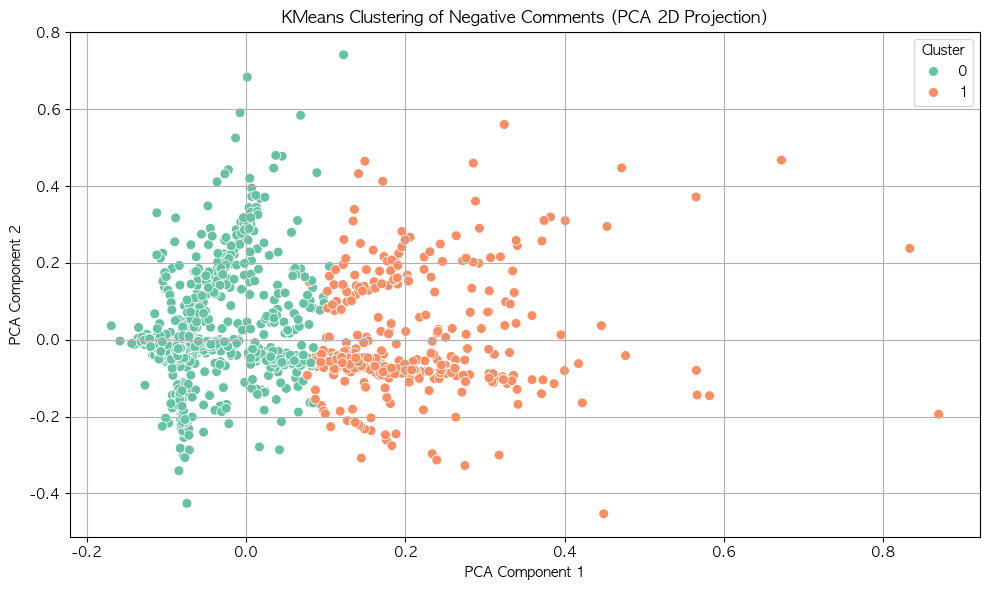

In [207]:
# PCA로 차원 축소 (2D)
pca = PCA(n_components=2, random_state=42)
X_neg_2d = pca.fit_transform(X_neg.toarray())  # X_neg은 TF-IDF 행렬

# 데이터프레임으로 묶기
viz_df = pd.DataFrame({
    'PCA1': X_neg_2d[:, 0],
    'PCA2': X_neg_2d[:, 1],
    'cluster': negative_df['cluster']
})

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=viz_df, x='PCA1', y='PCA2', hue='cluster', palette='Set2', s=50)
plt.title("KMeans Clustering of Negative Comments (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [211]:
# '중국'이라는 단어가 포함된 댓글만 추출 (결측 제거 포함)
china_df = df_tariff[df_tariff['text'].str.contains('중국', na=False)].copy()

# 결과 미리보기
print(f"🔍 '중국' 포함 댓글 수: {len(china_df)}")
china_df[['text', 'vader_score']].head()

🔍 '중국' 포함 댓글 수: 214


,text,vader_score
12,그럼 중국한테올인해 중국산 식품 전자제품 다 수입하고 ㅋㅋㅋㅋㅋㅋ 1찍은 종나게 하면서 또 그건싫어하더라,-0.960780
14,우리나라도 캐나다처럼 미국과 맞대응하자 말이 우방국 이지 완전히 깡패야 깡패 중국도 깡패고 미국도 깡패고 이 깡패 두 나래를 지구에서 없어져야돼,-0.978889
22,민주당 좋아하시는분들아 <br>그럼 미국보더 중국이 좋아요?,-0.910696
39,나라가 중국에 넘어갔으니 그러지 뭘,-0.930762
53,뉴스 진짜 👍 😂😂😂😂😂 어제 중국 오늘 미국 😅😅😅😅😅,0.502665


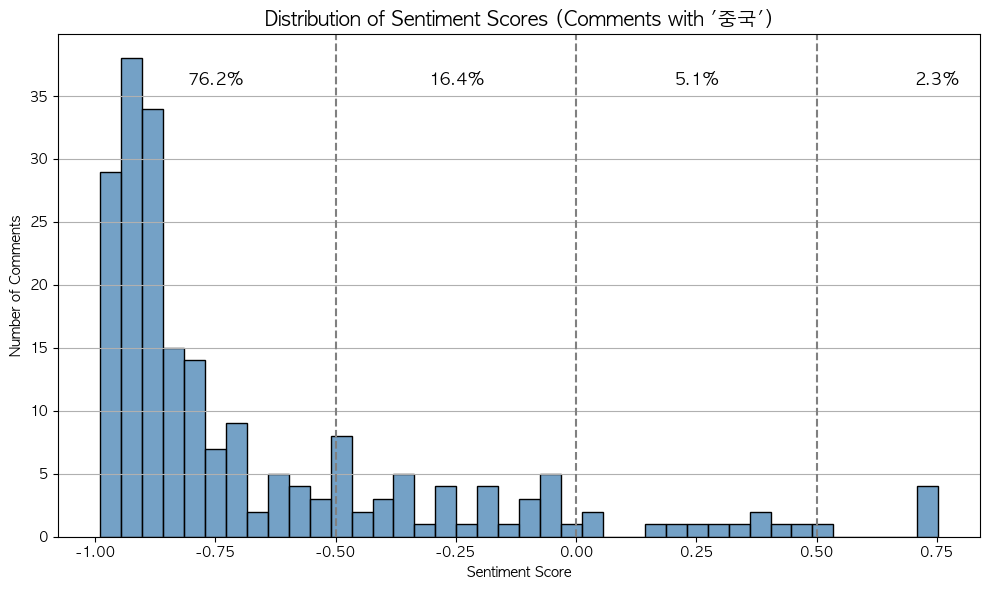

In [213]:
# 2. 유효한 감정 점수만 필터링
china_df = china_df[china_df['vader_score'].notnull()]

# 3. 감정 점수 구간별 비율 계산
bins = [-1.0, -0.5, 0.0, 0.5, 1.0]
labels = ['-1 ~ -0.5', '-0.5 ~ 0', '0 ~ 0.5', '0.5 ~ 1']
china_df['score_range'] = pd.cut(china_df['vader_score'], bins=bins, labels=labels, include_lowest=True)
range_counts = china_df['score_range'].value_counts(normalize=True).sort_index()

# 4. 히스토그램 시각화
plt.figure(figsize=(10, 6))
sns.histplot(china_df['vader_score'], bins=40, kde=False, color='steelblue', edgecolor='black')

# 점선과 라벨 추가
for x in [-0.5, 0, 0.5]:
    plt.axvline(x, color='gray', linestyle='--')

# 비율 텍스트 표시
for i, (label, pct) in enumerate(zip(range_counts.index, range_counts)):
    xpos = (bins[i] + bins[i+1]) / 2
    plt.text(xpos, plt.ylim()[1]*0.9, f"{pct:.1%}", ha='center', fontsize=12, fontweight='bold')

# 설정
plt.title("Distribution of Sentiment Scores (Comments with '중국')", fontsize=14)
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Comments")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [219]:
# 1. 텍스트 리스트
china_texts = china_df['text'].dropna().tolist()

# 2. 형태소 분석기
okt = Okt()

# 3. 명사만 추출 후 빈도수 계산
word_counter = Counter()

tqdm.pandas()  # 진행률 표시용
for text in tqdm(china_texts, desc="📚 단어 분석 중"):
    try:
        nouns = okt.nouns(text)
        word_counter.update(nouns)
    except:
        continue

# 4. 상위 20개 단어 출력
top_words = word_counter.most_common(20)

# 결과 출력
print("📊 Top 20 Most Common Nouns in Comments with '중국':")
for i, (word, count) in enumerate(top_words, start=1):
    print(f"{i}. {word} - {count}회")

📚 단어 분석 중:   0%|          | 0/214 [00:00<?, ?it/s]

📊 Top 20 Most Common Nouns in Comments with '중국':
1. 중국 - 253회
2. 미국 - 149회
3. 한국 - 60회
4. 관세 - 56회
5. 나라 - 31회
6. 러시아 - 30회
7. 일본 - 26회
8. 우리 - 23회
9. 국가 - 23회
10. 것 - 20회
11. 트럼프 - 19회
12. 우리나라 - 17회
13. 유럽 - 17회
14. 수출 - 16회
15. 거 - 15회
16. 임 - 15회
17. 대만 - 14회
18. 더 - 14회
19. 경제 - 13회
20. 공장 - 12회


In [223]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from konlpy.tag import Okt

# 1. 데이터 준비 (텍스트 정제)
okt = Okt()

def preprocess(text):
    try:
        return ' '.join(okt.nouns(text))
    except:
        return ''

# 전처리
china_df['clean_text'] = china_df['text'].apply(preprocess)

# 2. TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=1000)
X_media = vectorizer.fit_transform(china_df['clean_text'])

In [227]:
# 3. KMeans 클러스터링 (2개 클러스터)
kmeans_china = KMeans(n_clusters=2, random_state=42)
china_df['cluster'] = kmeans_china.fit_predict(X_media)

In [229]:
# 클러스터별 핵심 키워드 함수
def get_top_keywords_media(cluster_num, n_terms=10):
    centroids = kmeans_china.cluster_centers_
    terms = vectorizer.get_feature_names_out()
    top_terms = centroids[cluster_num].argsort()[::-1][:n_terms]
    return [terms[i] for i in top_terms]

# 출력
for i in range(2):
    print(f"\n🔹 Cluster {i} Top Keywords:")
    print(", ".join(get_top_keywords_media(i)))


🔹 Cluster 0 Top Keywords:
중국, 미국, 나라, 관세, 우리, 국가, 트럼프, 수출, 러시아, 우리나라

🔹 Cluster 1 Top Keywords:
한국, 러시아, 일본, 중국, 중국인, 관세, 인도, 대만, 우리, 미국


In [231]:
# 대표 댓글 출력
for i in range(2):
    print(f"\n🗣️ Cluster {i} 대표 댓글:")
    samples = china_df[china_df['cluster'] == i]['text'].dropna()
    n = min(3, len(samples))
    if n > 0:
        for idx, comment in enumerate(samples.sample(n, random_state=42), 1):
            print(f"{idx}. {comment}")
    else:
        print("❗ 댓글이 없습니다.")


🗣️ Cluster 0 대표 댓글:
1. 진짜 자동으로 중국이랑 외교하라고하네 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
2. 중국 은  미국이아니야 그라타고 미국 은 중국을 이기냐
3. 삼다리 외교 정책..<br>미국 중국 유럽

🗣️ Cluster 1 대표 댓글:
1. 한국은 중국과 같다<br>250％때려라
2. 뭐 러시아전쟁도 끝나서 러시아하고 손잡고 이제는 한국 중국 일본 아시아 3개국 경데연합도 생각해볼 필요가 있음 시장이 미국만있는것도 아니고 저들이 먼저 신의를 져버렸으니 우리도 살아야지~~씁쓸하구만
3. 식민지 현대버전인가 ㄷㄷ 중국 일본 러시아로 전환 안하면 한국은 끝나겠네


In [233]:
# china 미포함 댓글 필터링
non_china_df = df_tariff[~df_tariff['text'].str.contains('중국', na=False)].copy()

# 확인
print(f"✅ '중국' 미포함 댓글 수: {len(non_china_df)}")

✅ '중국' 미포함 댓글 수: 2035


In [241]:
# 전처리 함수 (명사 기반)
def preprocess(text):
    try:
        return ' '.join(okt.nouns(text))
    except:
        return ''

# 전처리
non_china_df['clean_text'] = non_china_df['text'].apply(preprocess)

# TF-IDF 벡터화
vectorizer_nonchina = TfidfVectorizer(max_features=1000)
X_nonchina = vectorizer_nonchina.fit_transform(non_china_df['clean_text'])

In [243]:
# KMeans 클러스터링 (3개 클러스터 예시)
kmeans_nonchina = KMeans(n_clusters=3, random_state=42)
non_china_df['cluster'] = kmeans_nonchina.fit_predict(X_nonchina)

/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/hf-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight


In [245]:
# 키워드 추출 함수
def get_top_keywords_nonchina(cluster_num, n_terms=10):
    centroids = kmeans_nonchina.cluster_centers_
    terms = vectorizer_nonchina.get_feature_names_out()
    top_terms = centroids[cluster_num].argsort()[::-1][:n_terms]
    return [terms[i] for i in top_terms]

# 클러스터별 키워드
for i in range(3):
    print(f"\n🔹 Cluster {i} Top Keywords:")
    print(", ".join(get_top_keywords_nonchina(i)))

# 클러스터별 대표 댓글
for i in range(3):
    print(f"\n🗣️ Cluster {i} 대표 댓글:")
    samples = non_china_df[non_china_df['cluster'] == i]['text'].dropna()
    n = min(3, len(samples))
    if n > 0:
        for idx, comment in enumerate(samples.sample(n, random_state=42), 1):
            print(f"{idx}. {comment}")
    else:
        print("❗ 댓글이 없습니다.")


🔹 Cluster 0 Top Keywords:
트럼프, 관세, 우리, 나라, 계란, 성조기, 그냥, 대통령, 진짜, 우리나라

🔹 Cluster 1 Top Keywords:
미국, 관세, 우리, 트럼프, 수출, 세계, 나라, 이제, 전세계, 불매운동

🔹 Cluster 2 Top Keywords:
한국, 미국, 관세, 일본, 대해, 이상, 트럼프, 나라, 제품, 수출

🗣️ Cluster 0 대표 댓글:
1. 보수우파들이 믿는 영원한 우방 미국 ㅋㅋㅋ 성조기 흔들어라 보수우파들아 ㅋㅋㅋ
2. 우리도 대응 관세 매겨야 함<br>트럼프는 가만히 있으면 더 만만하게 보기 때문
3. 태극기 영간님들   ...

🗣️ Cluster 1 대표 댓글:
1. 세계적으로 미국을 상대로 똑같이 대해줘야함
2. 미국에 거대 투자하지말고 관세물고 투자금액 보유하라
3. 미국수출은 하지 말자.

🗣️ Cluster 2 대표 댓글:
1. 그건 한국뿐 아니라 선진국 전체 얘기임 미국은 제외
2. 한국도 슬슬 보복할 차례네 25프로 그대로 돌려줄게
3. 600만명분 마약을 한국 경유해 미국으로 보내려고 했다며?.. 중공의 마약 중개인이 되어버린 한국인데.. 관세 안 때리게 생겼냐? 마약수사 방해하고, 관련예상 전액 삭감한 더불어중공당 전부 이적죄로 체포 수사하라


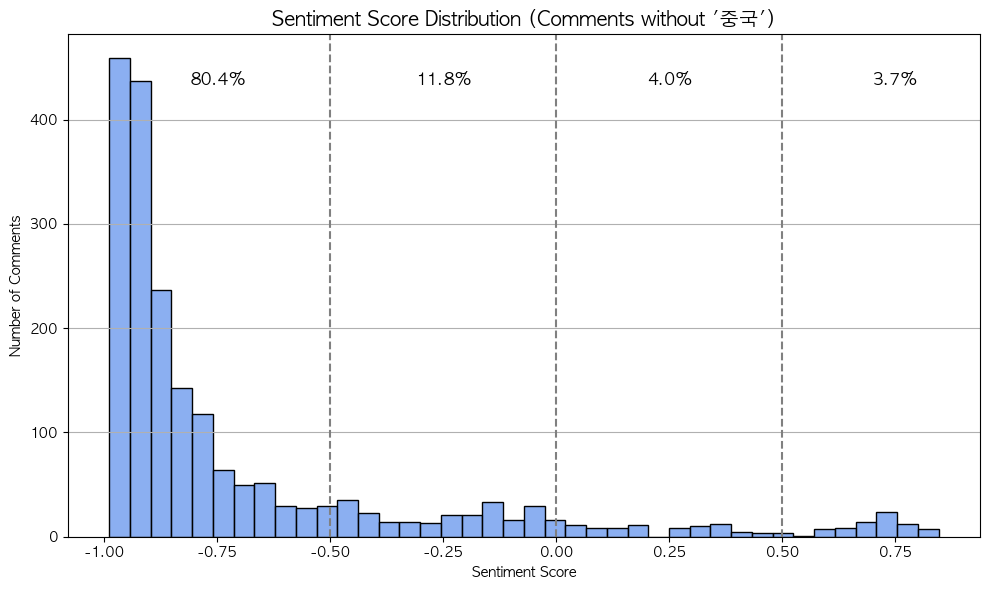

In [247]:
# 1. 유효한 vader_score 필터링
non_china_scores = non_china_df[non_china_df['vader_score'].notnull()].copy()

# 2. 감정 구간 비율 계산
bins = [-1.0, -0.5, 0.0, 0.5, 1.0]
labels = ['-1 ~ -0.5', '-0.5 ~ 0', '0 ~ 0.5', '0.5 ~ 1']
non_china_scores['score_range'] = pd.cut(non_china_scores['vader_score'], bins=bins, labels=labels, include_lowest=True)
range_counts = non_china_scores['score_range'].value_counts(normalize=True).sort_index()

# 3. 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(non_china_scores['vader_score'], bins=40, kde=False, color='cornflowerblue', edgecolor='black')

# 구분선 그리기
for x in [-0.5, 0, 0.5]:
    plt.axvline(x, color='gray', linestyle='--')

# 각 구간 비율 텍스트
for i, (label, pct) in enumerate(zip(range_counts.index, range_counts)):
    xpos = (bins[i] + bins[i+1]) / 2
    plt.text(xpos, plt.ylim()[1]*0.9, f"{pct:.1%}", ha='center', fontsize=12, fontweight='bold')

# 설정
plt.title("Sentiment Score Distribution (Comments without '중국')", fontsize=14)
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Comments")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

/var/folders/9g/4ckvsl7x1p34ttfd90yh0m0h0000gn/T/ipykernel_63510/276829802.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_stats, x='Cluster', y='Average Score', palette='Set2')


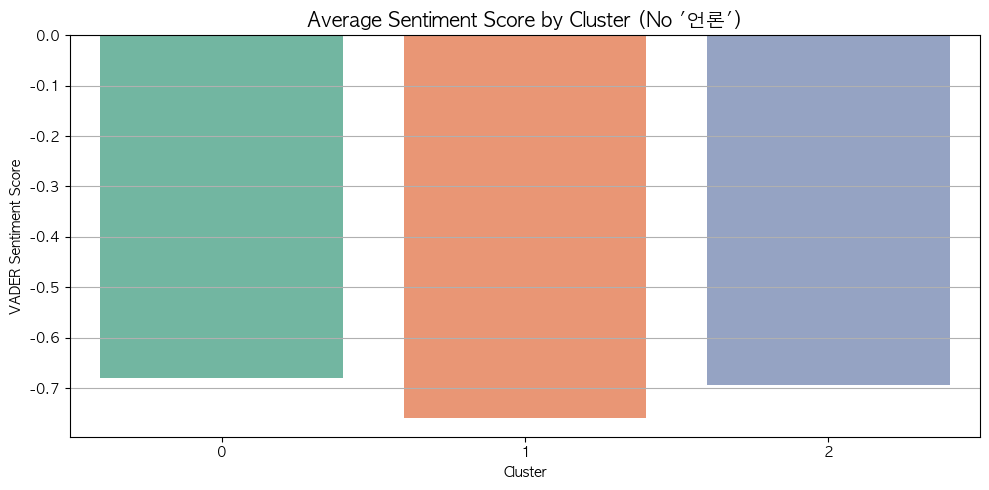

,Cluster,Average Score,Std Dev,Count
0,0,-0.679476,0.430005,1565
1,1,-0.758758,0.318287,335
2,2,-0.693303,0.354275,135


In [249]:
# 1. 감정 점수가 존재하는 데이터만
valid_cluster_scores = non_china_df[['cluster', 'vader_score']].dropna()

# 2. 통계 계산
cluster_stats = valid_cluster_scores.groupby('cluster')['vader_score'].agg(['mean', 'std', 'count']).reset_index()
cluster_stats.columns = ['Cluster', 'Average Score', 'Std Dev', 'Count']

# 3. 평균 점수 시각화
plt.figure(figsize=(10, 5))
sns.barplot(data=cluster_stats, x='Cluster', y='Average Score', palette='Set2')
plt.title("Average Sentiment Score by Cluster (No '언론')", fontsize=14)
plt.ylabel("VADER Sentiment Score")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 4. 통계표 출력
display(cluster_stats)